In [1]:
import os
import sys
sys.path.append('../')

import time
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from dps import darkphoton, sample
from dps.fit import dcs

### Instantiation time

In [2]:
M = 2.0
Ns = [int(2**i) for i in range(8, 11)]
comp_time = list()

for N in Ns:
    
    print(N)

    t1 = time.time()
    f = dcs.DCS(M, Nz=N, NkT=N)
    t2 = time.time()
    comp_time.append(t2 - t1)

256


/home/jonas/venv/3/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/jonas/venv/3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/jonas/venv/3/lib/python3.6/site-packages/pandas/core/frame.py:2823: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[index, col] = value


512
1024


In [3]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(Ns, comp_time, marker='+', Linestyle='--')
ax.set_xlabel(r"sample size", fontsize=14)
ax.set_ylabel(r"instantiation computation time $[s]$")
ax.set(xscale='log', yscale='linear')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

### Generation time

In [2]:
M = 2.0
Ns = [int(10**i) for i in range(1, 8)]
comp_time1 = list()
comp_time2 = list()

f1 = dcs.DCS(M, Nz=300, NkT=300)
f2 = dcs.DCS(M, Nz=100, NkT=100)

dp = darkphoton.DarkPhoton(M)

for N in Ns:
    
    print(N)
    
    sample.sample(dp, "random", N)

    t1 = time.time()
    _ = f1.inf(dp.z, dp.kT)
    t2 = time.time()
    comp_time1.append((t2 - t1) / N)
    
    t1 = time.time()
    _ = f2.inf(dp.z, dp.kT)
    t2 = time.time()
    comp_time2.append((t2 - t1) / N)

/home/jonas/venv/3/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


10
100
1000
10000
100000
1000000
10000000


<IPython.core.display.Javascript object>


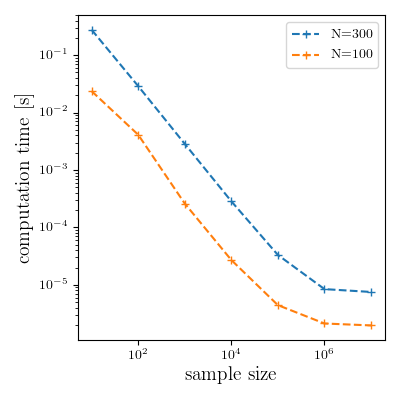

In [5]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(Ns, comp_time1, marker='+', Linestyle='--', label="N=300")
ax.plot(Ns, comp_time2, marker='+', Linestyle='--', label="N=100")
ax.set_xlabel("sample size", fontsize=14)
ax.set_ylabel("computation time [s]", fontsize=14)
ax.set(xscale='log', yscale='log')

plt.legend()
plt.tight_layout()
plt.show()